In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import missingno as msno

%matplotlib inline
warnings.filterwarnings("ignore")

## **Reading Data and Selecting The Variables**


In [256]:
working_directory = "\\".join(os.getcwd().split("\\")[:-1])
DATASETS = os.path.join(working_directory, "data")
RAW_PATH = os.path.join(DATASETS, "raw")
parquet_name = os.path.join(RAW_PATH, "bfrss2022.parquet")

In [257]:
df = pd.read_parquet(parquet_name)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(318), object(8)
memory usage: 1.1+ GB


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,02032022,02,03,2022,1100.0,2022000001,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
1,1.0,1.0,02042022,02,04,2022,1100.0,2022000002,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0
2,1.0,1.0,02022022,02,02,2022,1100.0,2022000003,2.022000e+09,1.0,...,4.0,NaN,2.0,0.0,1.0,0.0,1.0,NaN,NaN,2.0
3,1.0,1.0,02032022,02,03,2022,1100.0,2022000004,2.022000e+09,1.0,...,3.0,2.0,2.0,0.0,1.0,0.0,1.0,9.0,9.0,2.0
4,1.0,1.0,02022022,02,02,2022,1100.0,2022000005,2.022000e+09,1.0,...,4.0,NaN,1.0,10.0,1.0,140.0,1.0,NaN,NaN,2.0


**Looking for Missing Values and Handling Them**


Since missing values are very few compared to the size of the data, there is no problem in deleting them.


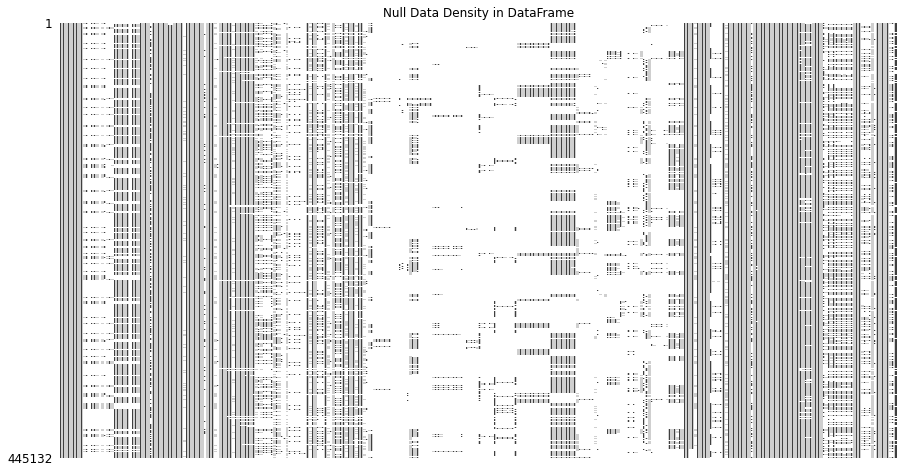

In [258]:
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Visualize null data density
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=10)
plt.title('Null Data Density in DataFrame')
plt.show()

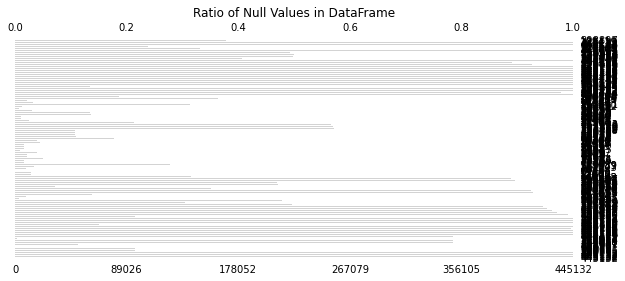

In [259]:
# Calculate the ratio of null values in each column
null_ratio = df.isnull().mean()

# Plot the bar chart
plt.figure(figsize=(15, 8))
msno.bar(df, color='lightgray', figsize=(10, 4), fontsize=10)
plt.title('Ratio of Null Values in DataFrame')

# Remove x-axis labels
plt.yticks([])

plt.show()

In [260]:
# Set the threshold for null values
threshold = 0.05  # Adjust as needed

# Calculate the number of non-null values required for a column to be retained
min_non_nulls = int((1 - threshold) * len(df))

# Drop columns based on the threshold
df = df.dropna(axis=1, thresh=min_non_nulls)
df


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SEXVAR,...,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8
0,1.0,1.0,02032022,02,03,2022,1100.0,2022000001,2.022000e+09,2.0,...,4.0,9.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
1,1.0,1.0,02042022,02,04,2022,1100.0,2022000002,2.022000e+09,2.0,...,2.0,3.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
2,1.0,1.0,02022022,02,02,2022,1100.0,2022000003,2.022000e+09,2.0,...,4.0,6.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
3,1.0,1.0,02032022,02,03,2022,1100.0,2022000004,2.022000e+09,2.0,...,2.0,9.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0
4,1.0,1.0,02022022,02,02,2022,1100.0,2022000005,2.022000e+09,2.0,...,3.0,3.0,4.0,1.0,1.0,1.0,10.0,1.0,140.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,11.0,12192022,12,19,2022,1100.0,2022001527,2.022002e+09,2.0,...,2.0,1.0,4.0,1.0,1.0,7.0,900.0,9.0,99900.0,9.0
445128,78.0,11.0,12212022,12,21,2022,1100.0,2022001528,2.022002e+09,2.0,...,4.0,5.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
445129,78.0,11.0,11292022,11,29,2022,1100.0,2022001529,2.022002e+09,2.0,...,2.0,9.0,1.0,2.0,2.0,7.0,900.0,9.0,99900.0,9.0
445130,78.0,11.0,12082022,12,08,2022,1100.0,2022001530,2.022002e+09,1.0,...,3.0,5.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0


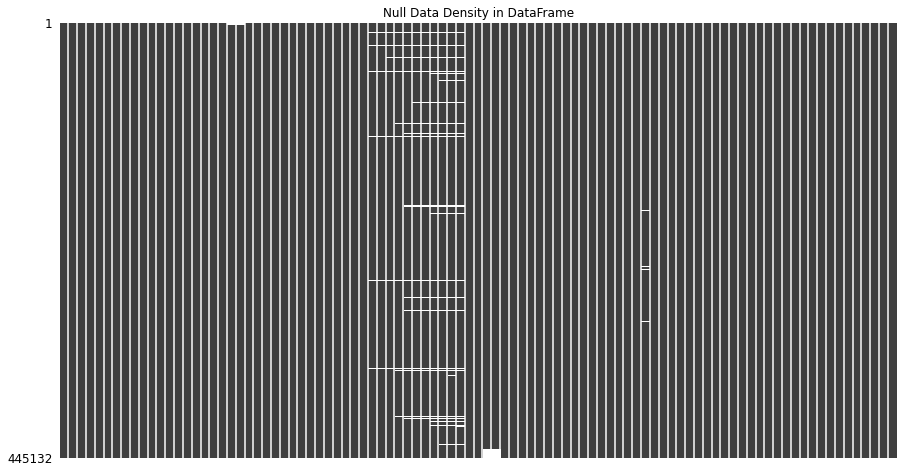

In [261]:
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Visualize null data density
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=10)
plt.title('Null Data Density in DataFrame')
plt.show()

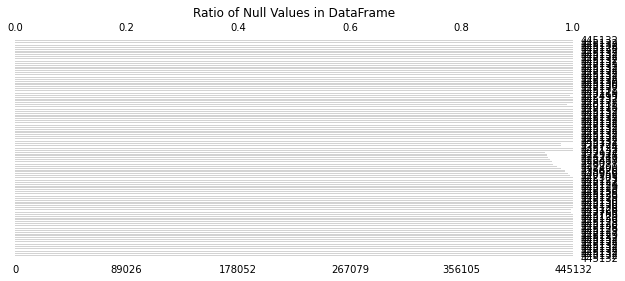

In [262]:
# Calculate the ratio of null values in each column
null_ratio = df.isnull().mean()

# Plot the bar chart
plt.figure(figsize=(15, 8))
msno.bar(df, color='lightgray', figsize=(10, 4), fontsize=10)
plt.title('Ratio of Null Values in DataFrame')

# Remove x-axis labels
plt.yticks([])

plt.show()

In [263]:
# Set the threshold for null values
threshold = 0.05 # Adjust as needed


# Calculate the number of non-null values required for a row to be retained
min_non_nulls = int((1 - threshold) * len(df.columns))

# Drop rows based on the threshold
df = df.dropna(axis=0, thresh=min_non_nulls)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SEXVAR,...,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8
0,1.0,1.0,02032022,02,03,2022,1100.0,2022000001,2.022000e+09,2.0,...,4.0,9.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
1,1.0,1.0,02042022,02,04,2022,1100.0,2022000002,2.022000e+09,2.0,...,2.0,3.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
2,1.0,1.0,02022022,02,02,2022,1100.0,2022000003,2.022000e+09,2.0,...,4.0,6.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
3,1.0,1.0,02032022,02,03,2022,1100.0,2022000004,2.022000e+09,2.0,...,2.0,9.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0
4,1.0,1.0,02022022,02,02,2022,1100.0,2022000005,2.022000e+09,2.0,...,3.0,3.0,4.0,1.0,1.0,1.0,10.0,1.0,140.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,11.0,12192022,12,19,2022,1100.0,2022001527,2.022002e+09,2.0,...,2.0,1.0,4.0,1.0,1.0,7.0,900.0,9.0,99900.0,9.0
445128,78.0,11.0,12212022,12,21,2022,1100.0,2022001528,2.022002e+09,2.0,...,4.0,5.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
445129,78.0,11.0,11292022,11,29,2022,1100.0,2022001529,2.022002e+09,2.0,...,2.0,9.0,1.0,2.0,2.0,7.0,900.0,9.0,99900.0,9.0
445130,78.0,11.0,12082022,12,08,2022,1100.0,2022001530,2.022002e+09,1.0,...,3.0,5.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0


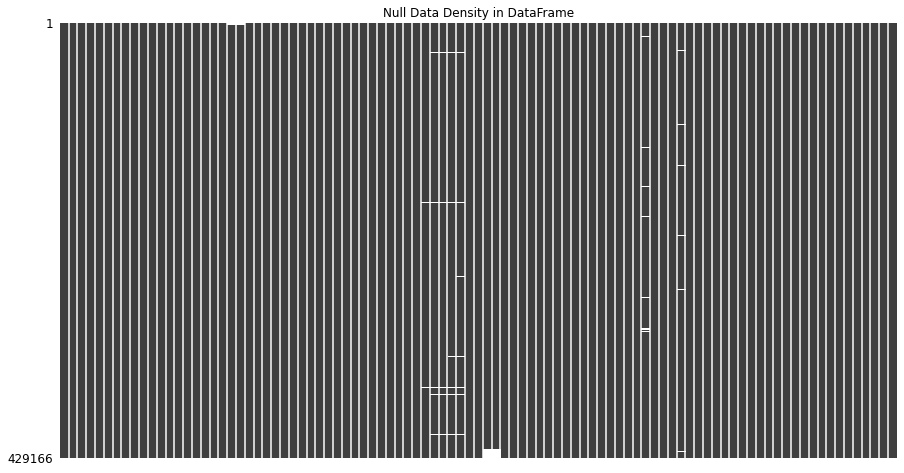

In [264]:
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Visualize null data density
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=10)
plt.title('Null Data Density in DataFrame')
plt.show()

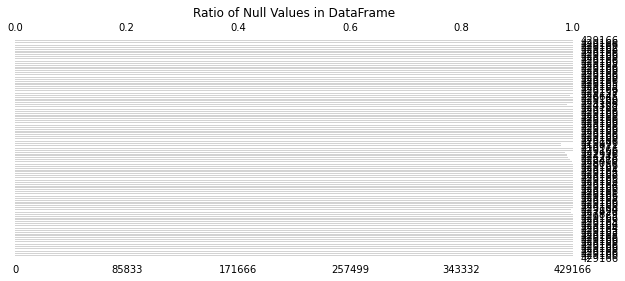

In [265]:
# Calculate the ratio of null values in each column
null_ratio = df.isnull().mean()

# Plot the bar chart
plt.figure(figsize=(15, 8))
msno.bar(df, color='lightgray', figsize=(10, 4), fontsize=10)
plt.title('Ratio of Null Values in DataFrame')

# Remove x-axis labels
plt.yticks([])

plt.show()

In [266]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SEXVAR,...,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8
0,1.0,1.0,02032022,02,03,2022,1100.0,2022000001,2.022000e+09,2.0,...,4.0,9.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
1,1.0,1.0,02042022,02,04,2022,1100.0,2022000002,2.022000e+09,2.0,...,2.0,3.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
2,1.0,1.0,02022022,02,02,2022,1100.0,2022000003,2.022000e+09,2.0,...,4.0,6.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
3,1.0,1.0,02032022,02,03,2022,1100.0,2022000004,2.022000e+09,2.0,...,2.0,9.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0
4,1.0,1.0,02022022,02,02,2022,1100.0,2022000005,2.022000e+09,2.0,...,3.0,3.0,4.0,1.0,1.0,1.0,10.0,1.0,140.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,11.0,12192022,12,19,2022,1100.0,2022001527,2.022002e+09,2.0,...,2.0,1.0,4.0,1.0,1.0,7.0,900.0,9.0,99900.0,9.0
445128,78.0,11.0,12212022,12,21,2022,1100.0,2022001528,2.022002e+09,2.0,...,4.0,5.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
445129,78.0,11.0,11292022,11,29,2022,1100.0,2022001529,2.022002e+09,2.0,...,2.0,9.0,1.0,2.0,2.0,7.0,900.0,9.0,99900.0,9.0
445130,78.0,11.0,12082022,12,08,2022,1100.0,2022001530,2.022002e+09,1.0,...,3.0,5.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0


In [267]:
df.dropna(inplace=True)

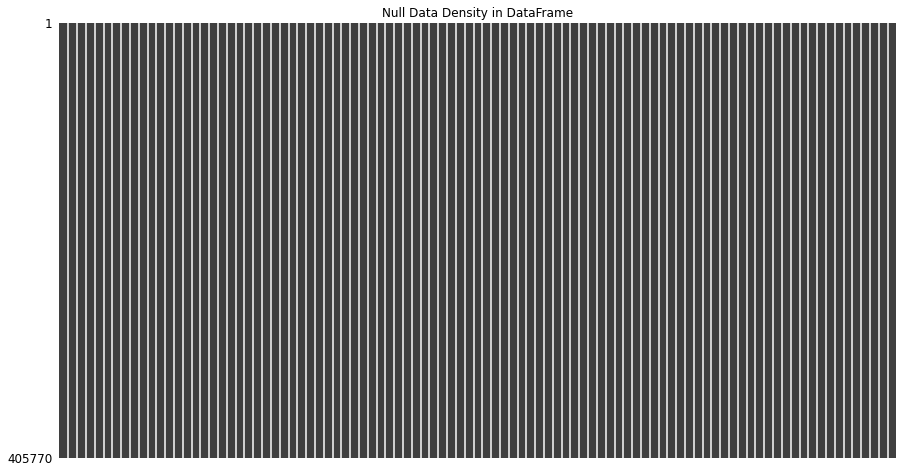

In [268]:
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Visualize null data density
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=10)
plt.title('Null Data Density in DataFrame')
plt.show()

In [269]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SEXVAR,...,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8
342,1.0,5.0,05122022,05,12,2022,1100.0,2022000343,2.022000e+09,2.0,...,3.0,6.0,3.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
343,1.0,5.0,05042022,05,04,2022,1100.0,2022000344,2.022000e+09,1.0,...,3.0,5.0,3.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
344,1.0,5.0,05122022,05,12,2022,1100.0,2022000345,2.022000e+09,1.0,...,4.0,5.0,3.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
345,1.0,5.0,05102022,05,10,2022,1100.0,2022000346,2.022000e+09,1.0,...,4.0,5.0,3.0,1.0,1.0,1.0,57.0,2.0,800.0,1.0
346,1.0,5.0,05102022,05,10,2022,1100.0,2022000347,2.022000e+09,2.0,...,3.0,2.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435820,56.0,12.0,01102023,01,10,2023,1100.0,2022004137,2.022004e+09,1.0,...,2.0,3.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0
435822,56.0,12.0,01122023,01,12,2023,1200.0,2022004139,2.022004e+09,2.0,...,4.0,9.0,4.0,1.0,1.0,1.0,33.0,1.0,233.0,1.0
435823,56.0,12.0,01102023,01,10,2023,1100.0,2022004140,2.022004e+09,1.0,...,2.0,5.0,3.0,1.0,1.0,1.0,7.0,1.0,140.0,1.0
435824,56.0,12.0,01052023,01,05,2023,1100.0,2022004141,2.022004e+09,2.0,...,3.0,9.0,4.0,1.0,1.0,1.0,17.0,1.0,233.0,1.0


In [270]:
df.isnull().sum().sum()

0

In [271]:
# Diabetes -> DIABETE4
# Obesity and Overweight -> _RFBMI5
# Smoking -> _SMOKER3
# Physical Inactivity -> _TOTINDA
# Gender -> SEXVAR
# Heredity -> _IMPRACE
# Age -> _AGE65YR
# Alcohol -> DRNKANY5
# Coronary Heart Disease -> CVDCRHD4
# Stroke -> CVDSTRK3
# Heart Attack -> CVDINFR4

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405770 entries, 342 to 435825
Data columns (total 95 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    405770 non-null  float64
 1   FMONTH    405770 non-null  float64
 2   IDATE     405770 non-null  object 
 3   IMONTH    405770 non-null  object 
 4   IDAY      405770 non-null  object 
 5   IYEAR     405770 non-null  object 
 6   DISPCODE  405770 non-null  float64
 7   SEQNO     405770 non-null  object 
 8   _PSU      405770 non-null  float64
 9   SEXVAR    405770 non-null  float64
 10  GENHLTH   405770 non-null  float64
 11  PHYSHLTH  405770 non-null  float64
 12  MENTHLTH  405770 non-null  float64
 13  PRIMINSR  405770 non-null  float64
 14  PERSDOC3  405770 non-null  float64
 15  MEDCOST1  405770 non-null  float64
 16  CHECKUP1  405770 non-null  float64
 17  EXERANY2  405770 non-null  float64
 18  SLEPTIM1  405770 non-null  float64
 19  LASTDEN4  405770 non-null  float64
 20  RMVTETH

In [273]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Create a DataFrame with only the categorical columns
df_categorical = df[categorical_columns]

# Assuming 'target_column' is your target variable
# Replace 'target_column' with your actual target column name

# Selecting features and target variable
X = df_categorical
y = df['CVDCRHD4']

# Applying the chi-square test
chi2_selector = SelectKBest(chi2, k='all')  # 'all' selects all features
X_chi2_selected = chi2_selector.fit_transform(X, y)

# Get the p-values and selected features
p_values = chi2_selector.pvalues_
selected_features = X.columns[chi2_selector.get_support()]

# Display the results
result_df = pd.DataFrame({'Feature': X.columns, 'P-Value': p_values})
result_df['Selected'] = result_df['Feature'].isin(selected_features)
print(result_df)


  Feature       P-Value  Selected
0   IDATE  0.000000e+00      True
1  IMONTH  3.473496e-01      True
2    IDAY  9.538415e-08      True
3   IYEAR  9.999994e-01      True
4   SEQNO  5.802450e-02      True


In [274]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

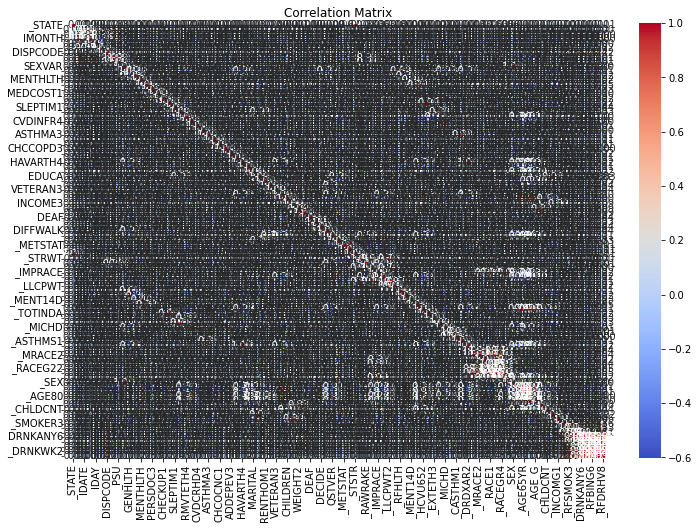

In [275]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [276]:
# Set the correlation threshold
correlation_threshold = 0.7  # Adjust as needed

# Filter features highly correlated with the target variable
target_correlation = correlation_matrix['CVDCRHD4'].abs()
selected_features_target = target_correlation[target_correlation > correlation_threshold].index

# Filter features highly correlated with each other
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Display the selected features
print("Features Highly Correlated with the Target Variable:")
print(selected_features_target)

print("\nFeatures Highly Correlated with Each Other:")
print(correlated_features)

Features Highly Correlated with the Target Variable:
Index(['CVDCRHD4'], dtype='object')

Features Highly Correlated with Each Other:
{'_HLTHPLN', '_MRACE2', '_AGE_G', '_AGE65YR', '_DRDXAR2', '_AGE80', '_ASTHMS1', '_EDUCAG', '_RFBING6', '_RFBMI5', '_TOTINDA', '_AGEG5YR', '_LLCPWT', '_CURECI2', '_RACE1', '_RACEGR4', '_CASTHM1', '_SEX', 'DROCDY4_', '_LLCPWT2', 'IMONTH', '_RFDRHV8', '_RACEPR1', '_PSU', '_WT2RAKE', '_DENVST3', '_RACEG22', 'IDATE', '_DRNKWK2', '_INCOMG1', '_STSTR'}


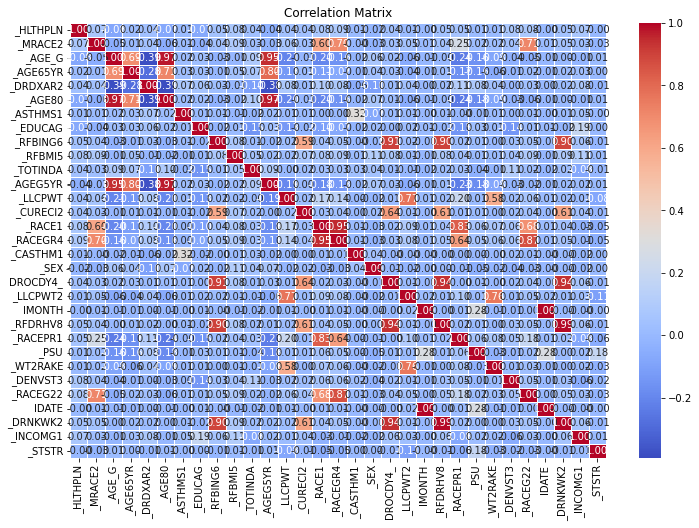

In [277]:
correlation_matrix = df[list(correlated_features)].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [278]:
# Diabetes -> DIABETE4
# Obesity and Overweight -> _RFBMI5
# Smoking -> _SMOKER3
# Physical Inactivity -> _TOTINDA
# Gender -> SEXVAR
# Heredity -> _IMPRACE
# Age -> _AGE65YR
# Alcohol -> DRNKANY5
# Coronary Heart Disease -> CVDCRHD4
# Stroke -> CVDSTRK3
# Heart Attack -> CVDINFR4

In [279]:
df_selected = df[
                [
                    "SEXVAR",
                    "_IMPRACE",
                    "_AGE65YR",
                    "GENHLTH",
                    "_RFBMI5",
                    "_TOTINDA",
                    "_SMOKER3",
                    "DRNKANY6",
                    "DIABETE4",
                    "CVDSTRK3",
                    "CVDCRHD4",
                    "CVDINFR4",
                ]
            ]

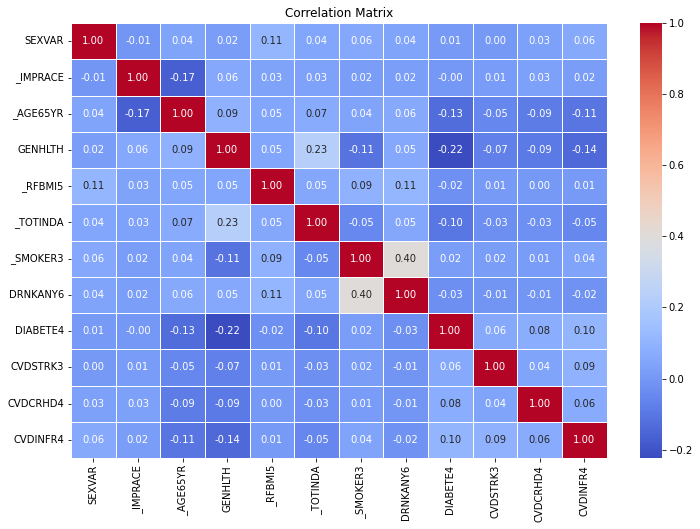

In [280]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **Data Exploration**


**SEXVAR**


SEXVAR column contains participants gender information. 1 means male and 2 means female. For better reading, the column renamed as 'Gender'.


<AxesSubplot:xlabel='Gender', ylabel='count'>

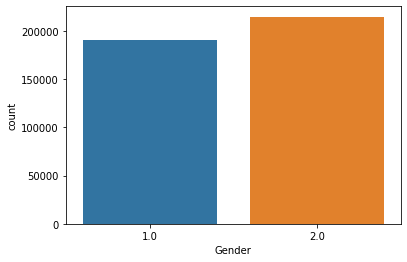

In [281]:
df_selected["SEXVAR"].value_counts()
df_selected = df_selected.rename(columns={"SEXVAR": "Gender"})
sns.countplot(x="Gender", data=df_selected)

**\_IMPRACE**


The \_IMPRACE column contains participants race information.

- 1 means White
- 2 means Black
- 3 means Asian
- 4 means American Indian/Alaskan Native
- 5 means Hispanic
- 6 means Other race

For better reading, the column renamed as 'Race'.


<AxesSubplot:xlabel='Race', ylabel='count'>

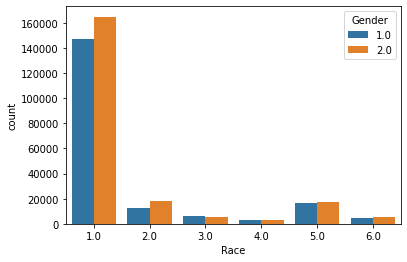

In [282]:
df_selected["_IMPRACE"].value_counts()
df_selected = df_selected.rename(columns={"_IMPRACE": "Race"})
sns.countplot(x="Race", hue="Gender", data=df_selected)

**\_AGE65YR**


The \_AGE65YR column contains information about the age of the participants. Participants aged 65 and older are marked as 2, while younger ones are marked as 1. 3 means missing values and they removed.

For better reading, the column renamed as 'Over 65 Years Old'.


<AxesSubplot:xlabel='Over_65_Years_Old', ylabel='count'>

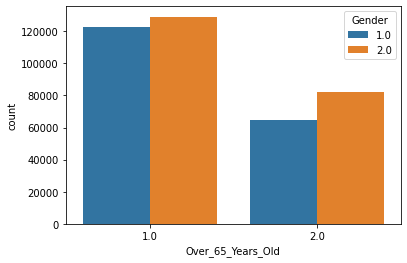

In [283]:
df_selected["_AGE65YR"].value_counts()
df_selected.drop(df_selected[df_selected["_AGE65YR"] == 3].index, inplace=True)
df_selected = df_selected.rename(columns={"_AGE65YR": "Over_65_Years_Old"})
sns.countplot(x="Over_65_Years_Old", hue="Gender", data=df_selected)

**GENHLTH**


The GENHLTH column contains participants general health information.

- 1 means excellent
- 2 means very good
- 3 means good
- 4 means fair
- 5 means poor
- 7 and 9 means Don’t know/Not Sure/Refused

For better reading, the column renamed as 'General Health Status'. Uncertain values removed.


<AxesSubplot:xlabel='General_Health_Status', ylabel='count'>

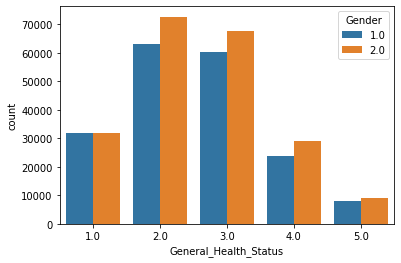

In [284]:
df_selected["GENHLTH"].value_counts()
df_selected = df_selected[(df["GENHLTH"] != 7) & (df_selected["GENHLTH"] != 9)]
df_selected = df_selected.rename(columns={"GENHLTH": "General_Health_Status"})
sns.countplot(x="General_Health_Status", hue="Gender", data=df_selected)

**\_RFBMI5**


The \_RFBMI5 column contains information about the participants' obesity and overweight status using the BMI score. Those with a BMI score of 25 and above marked 2, lower ones marked as 1. 9 means missing values and removed.

For better reading, the column renamed as 'Obesity and Overweight Status'.


<AxesSubplot:xlabel='Obesity_Overweight_Status', ylabel='count'>

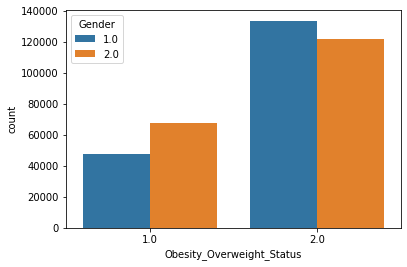

In [285]:
df_selected["_RFBMI5"].value_counts()
df_selected.drop(df_selected[df_selected["_RFBMI5"] == 9].index, inplace=True)
df_selected = df_selected.rename(columns={"_RFBMI5": "Obesity_Overweight_Status"})
sns.countplot(x="Obesity_Overweight_Status", hue="Gender", data=df_selected)

**\_TOTINDA**


In the \_TOTINDA column, participants who have done physical activity or exercise outside of their regular job in the last 30 days are marked with 1. Participants who stated that they did not do it are marked with 2. 9 means missing values and removed.

For better reading, the column has been renamed to 'Physical Activity Status'.


<AxesSubplot:xlabel='Physical_Activity_Status', ylabel='count'>

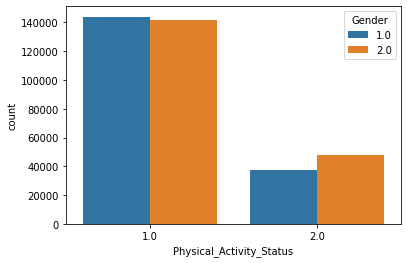

In [286]:
df_selected["_TOTINDA"].value_counts()
df_selected.drop(df_selected[df_selected["_TOTINDA"] == 9].index, inplace=True)
df_selected = df_selected.rename(columns={"_TOTINDA": "Physical_Activity_Status"})
sns.countplot(x="Physical_Activity_Status", hue="Gender", data=df_selected)

**\_SMOKER3**


The \_SMOKER3 column contains information about participants tobacco usage.

- 1 means Everyday smoker
- 2 means Someday smoker
- 3 means Former smoker
- 4 means Non-smoker
- 9 means Don’t know/Not Sure/Refused

For better reading, the column renamed as 'Tobacco Usage'. Uncertain values removed. Since the effects of smoking some days and smoking everyday on heart attack are not very different, these two values were combined and all the variables were renamed.

After editing:

- 1 means smoker
- 2 means former smoker
- 3 means non-smoker


<AxesSubplot:xlabel='Tobacco_Usage', ylabel='count'>

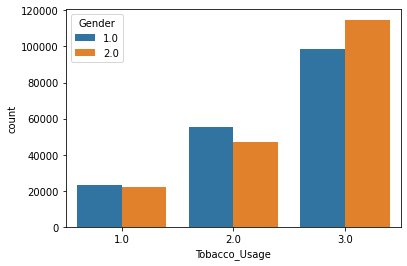

In [287]:
df_selected["_SMOKER3"].value_counts()
df_selected.drop(df_selected[df_selected["_SMOKER3"] == 9].index, inplace=True)
chg = {2: 1, 3: 2, 4: 3}
df_selected["_SMOKER3"].replace(to_replace=chg, inplace=True)
df_selected = df_selected.rename(columns={"_SMOKER3": "Tobacco_Usage"})
sns.countplot(x="Tobacco_Usage", hue="Gender", data=df_selected)

**DRNKANY5**


In the DRNKANY5 column, participants who having had at least one drink of alcohol in the past 30 days are marked with 1. Participants who stated that they did not drink it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Physical Activity Status'.


<AxesSubplot:xlabel='Alcohol_Usage', ylabel='count'>

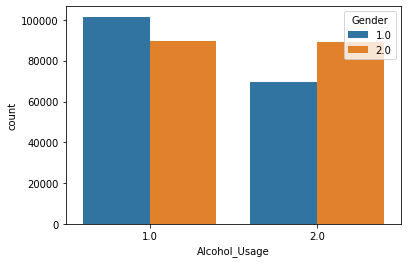

In [288]:
df_selected["DRNKANY6"].value_counts()
df_selected = df_selected[(df_selected["DRNKANY6"] != 7) & (df_selected["DRNKANY6"] != 9)]
df_selected = df_selected.rename(columns={"DRNKANY6": "Alcohol_Usage"})
sns.countplot(x="Alcohol_Usage", hue="Gender", data=df_selected)

**DIABETE4**


The DIABETE4 column contains information about participants diabetes mellitus.

- 1 means Has Diabetes
- 2 means Has Diabetes but Only During Pregnancy Period just for Female Participants
- 3 means Not Has Diabetes
- 4 means Has Pre-diabetes or Borberline Diabetes
- 7 means Don’t know/Not Sure
- 9 means Refused

For better reading, the column renamed as 'Diabetes Status'. Uncertain values removed. Since the effects of pregnancy diabetes on heart attack are not very important, they were combined with 'Not Has Diabetes'. On the other hand, since pre-diabetes or borderline diabetes is associated with heart diseases, these were combined with 'Has Diabetes'.

After editing:

- 1 means Has Diabetes
- 2 means Not Has Diabetes


<AxesSubplot:xlabel='Diabetes_Status', ylabel='count'>

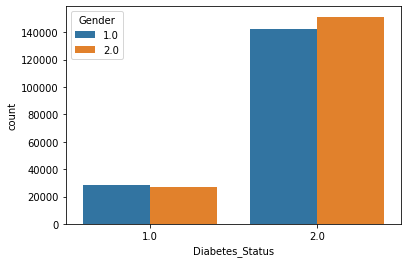

In [289]:
df_selected["DIABETE4"].value_counts()
df_selected = df_selected[(df_selected["DIABETE4"] != 7) & (df_selected["DIABETE4"] != 9)]
chg = {3: 2, 4: 1}
df_selected["DIABETE4"].replace(to_replace=chg, inplace=True)
df_selected = df_selected.rename(columns={"DIABETE4": "Diabetes_Status"})
sns.countplot(x="Diabetes_Status", hue="Gender", data=df_selected)

**CVDSTRK3**


In the CVDSTRK3 column, participants who had stroke at least one time in their life are marked with 1. Participants who stated that they did not had it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Stroke Status'.


<AxesSubplot:xlabel='Stroke_Status', ylabel='count'>

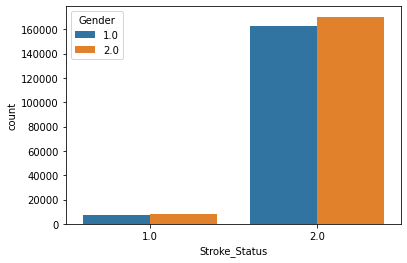

In [290]:
df_selected["CVDSTRK3"].value_counts()
df_selected = df_selected[(df_selected["CVDSTRK3"] != 7) & (df_selected["CVDSTRK3"] != 9)]
df_selected = df_selected.rename(columns={"CVDSTRK3": "Stroke_Status"})
sns.countplot(x="Stroke_Status", hue="Gender", data=df_selected)

**CVDCRHD4**


In the CVDCRHD4 column, participants who had angina or coronary heart disease are marked with 1. Participants who stated that they did not had it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Coronary Heart Disease Status'.


<AxesSubplot:xlabel='Coronary_Heart_Disease_Status', ylabel='count'>

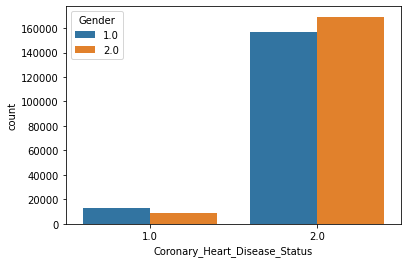

In [291]:
df_selected["CVDCRHD4"].value_counts()
df_selected = df_selected[(df["CVDCRHD4"] != 7) & (df_selected["CVDCRHD4"] != 9)]
df_selected = df_selected.rename(columns={"CVDCRHD4": "Coronary_Heart_Disease_Status"})
sns.countplot(x="Coronary_Heart_Disease_Status", hue="Gender", data=df_selected)

**CVDINFR4**


In the CVDINFR4 column, participants who had a heart attack also called a myocardial infarction are marked with 1. Participants who stated that they did not had it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Heart Attack Status'.

After editing:

- 0 means Had Heart Attack
- 1 means Not Had Heart Attack

This variable is the dependent variable of the project.


<AxesSubplot:xlabel='Heart_Attack_Status', ylabel='count'>

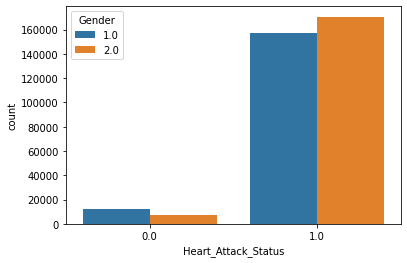

In [292]:
df_selected["CVDINFR4"].value_counts()
df_selected = df_selected[(df_selected["CVDINFR4"] != 7) & (df_selected["CVDINFR4"] != 9)]
chg = {1: 0, 2: 1}
df_selected["CVDINFR4"].replace(to_replace=chg, inplace=True)
df_selected = df_selected.rename(columns={"CVDINFR4": "Heart_Attack_Status"})
sns.countplot(x="Heart_Attack_Status", hue="Gender", data=df_selected)

**Last Shape of Data Set**


In [293]:
df_selected.info()
df_selected.head()

<class 'pandas.core.frame.DataFrame'>
Index: 347412 entries, 342 to 435824
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         347412 non-null  float64
 1   Race                           347412 non-null  float64
 2   Over_65_Years_Old              347412 non-null  float64
 3   General_Health_Status          347412 non-null  float64
 4   Obesity_Overweight_Status      347412 non-null  float64
 5   Physical_Activity_Status       347412 non-null  float64
 6   Tobacco_Usage                  347412 non-null  float64
 7   Alcohol_Usage                  347412 non-null  float64
 8   Diabetes_Status                347412 non-null  float64
 9   Stroke_Status                  347412 non-null  float64
 10  Coronary_Heart_Disease_Status  347412 non-null  float64
 11  Heart_Attack_Status            347412 non-null  float64
dtypes: float64(12)
memory usage: 34.5

,Gender,Race,Over_65_Years_Old,General_Health_Status,Obesity_Overweight_Status,Physical_Activity_Status,Tobacco_Usage,Alcohol_Usage,Diabetes_Status,Stroke_Status,Coronary_Heart_Disease_Status,Heart_Attack_Status
342,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
343,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
344,1.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
345,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
346,2.0,1.0,2.0,4.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0


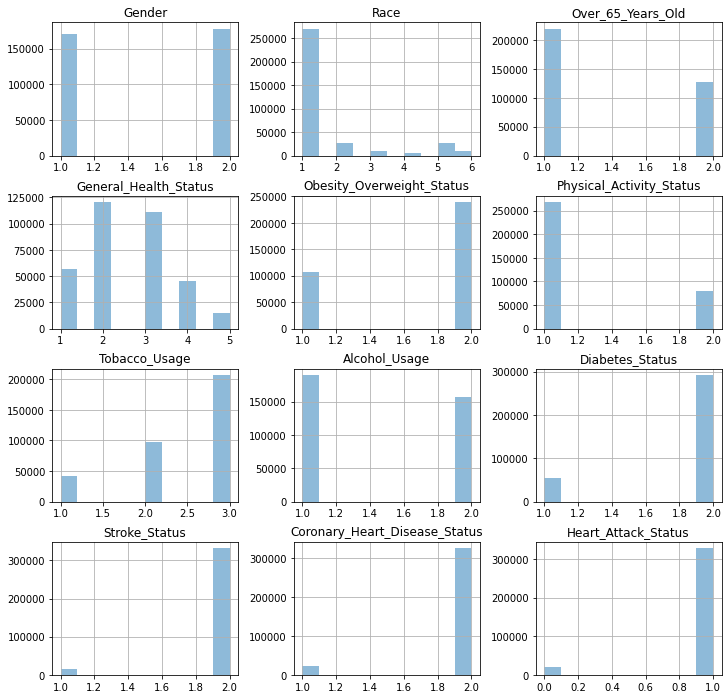

In [294]:
df_selected.hist(alpha=0.5, figsize=(12, 12))
plt.show()

,Gender,Race,Over_65_Years_Old,General_Health_Status,Obesity_Overweight_Status,Physical_Activity_Status,Tobacco_Usage,Alcohol_Usage,Diabetes_Status,Stroke_Status,Coronary_Heart_Disease_Status,Heart_Attack_Status
Gender,1.000000,-0.007292,0.045090,0.020389,-0.100488,0.058665,0.054156,0.093201,0.018801,-0.001318,0.059633,0.070100
Race,-0.007292,1.000000,-0.173700,0.052468,0.016416,0.034289,0.024895,0.046952,-0.023366,0.012419,0.041996,0.023720
Over_65_Years_Old,0.045090,-0.173700,1.000000,0.102877,-0.020154,0.086841,-0.015845,0.124689,-0.165587,-0.121462,-0.192065,-0.159291
General_Health_Status,0.020389,0.052468,0.102877,1.000000,0.146232,0.283651,-0.178803,0.180654,-0.271091,-0.162105,-0.203201,-0.186845
Obesity_Overweight_Status,-0.100488,0.016416,-0.020154,0.146232,1.000000,0.085012,-0.007256,0.025215,-0.154466,-0.014851,-0.042363,-0.035145
Physical_Activity_Status,0.058665,0.034289,0.086841,0.283651,0.085012,1.000000,-0.117965,0.158899,-0.147380,-0.085022,-0.082477,-0.088198
Tobacco_Usage,0.054156,0.024895,-0.015845,-0.178803,-0.007256,-0.117965,1.000000,0.007412,0.046288,0.064151,0.063692,0.087527
Alcohol_Usage,0.093201,0.046952,0.124689,0.180654,0.025215,0.158899,0.007412,1.000000,-0.151595,-0.073722,-0.070997,-0.076532
Diabetes_Status,0.018801,-0.023366,-0.165587,-0.271091,-0.154466,-0.147380,0.046288,-0.151595,1.000000,0.109875,0.153765,0.144484
Stroke_Status,-0.001318,0.012419,-0.121462,-0.162105,-0.014851,-0.085022,0.064151,-0.073722,0.109875,1.000000,0.154681,0.184641


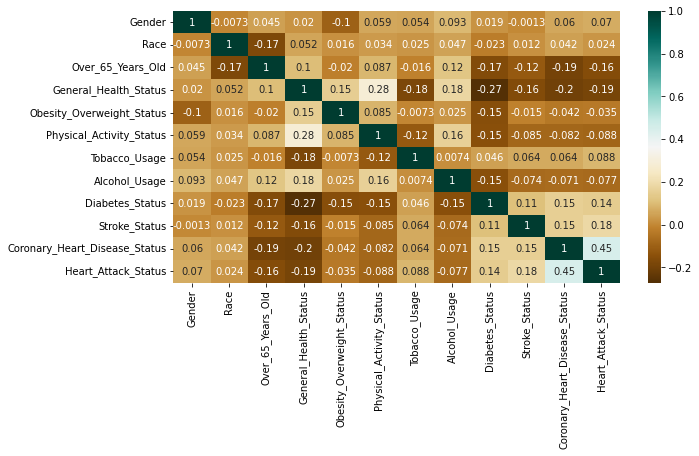

In [295]:
plt.figure(figsize=(10, 5))
c = df_selected.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c